<a href="https://colab.research.google.com/github/tmoura/softexIA/blob/main/MLP_Convolucional_Gatos_e_cachorros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning A Z Convolucional - Gatos e cachorros

In [ ]:
!pip install tensorflow==2.16.1

In [30]:
import numpy as np
import tensorflow as tf

In [ ]:
np.__version__, tf.__version__

In [31]:
import tempfile
import zipfile

temp_dir = tempfile.TemporaryDirectory()
print(temp_dir)

<TemporaryDirectory '/tmp/tmpebdrs4x1'>


In [32]:
with zipfile.ZipFile('dataset.zip', 'r') as zip:
  zip.extractall(temp_dir.name)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
classificador = Sequential()
classificador.add(InputLayer(shape = (64, 64, 3)))

classificador.add(Conv2D(32, (3, 3), activation='relu'))
classificador.add(MaxPooling2D(pool_size=(2, 2)))
classificador.add(Conv2D(32, (3, 3), activation='relu'))
classificador.add(MaxPooling2D(pool_size=(2, 2)))
classificador.add(Flatten())
classificador.add(Dense(units=128, activation='relu'))
classificador.add(Dense(units=128, activation='relu'))
classificador.add(Dense(units = 1, activation='sigmoid'))

In [ ]:
classificador.summary()

In [36]:
classificador.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
# gerador_treinamento = ImageDataGenerator(rescale=1./255, rotation_range=7,
#                                          horizontal_flip = True, shear_range=0.2,
#                                          height_shift_range = 0.07, zoom_range=0.2)

gerador_treinamento = ImageDataGenerator(rescale=1./255)

In [38]:
gerador_teste = ImageDataGenerator(rescale=1./255)

In [ ]:
base_treinamento = gerador_treinamento.flow_from_directory(f'{temp_dir.name}/dataset/training_set',
                                                           target_size = (64, 64),
                                                           class_mode='binary')

In [42]:
base_teste = gerador_teste.flow_from_directory(f'{temp_dir.name}/dataset/test_set',
                                               target_size = (64, 64),
                                               class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
classificador.fit(base_treinamento, epochs = 10)

In [44]:
imagem_teste = image.load_img(f'{temp_dir.name}/dataset/test_set/cachorro/dog.3500.jpg', target_size=(64,64))

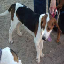

In [45]:
imagem_teste

In [ ]:
type(imagem_teste)

In [48]:
imagem_teste = image.img_to_array(imagem_teste)

In [ ]:
imagem_teste

In [50]:
imagem_teste /= 255

In [ ]:
imagem_teste

In [ ]:
imagem_teste.shape

In [52]:
imagem_teste = np.expand_dims(imagem_teste, axis = 0)

In [ ]:
imagem_teste.shape

In [ ]:
previsao = classificador.predict(imagem_teste)

In [ ]:
previsao

In [56]:
previsao = previsao > 0.5

In [ ]:
previsao

In [ ]:
base_treinamento.class_indices